## Nominal Data Visualization

### Titanic Test Data

In [1]:
%matplotlib inline

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Selecting Nominal Columns

In [3]:
titanic = pd.read_csv('/home/bhanuchander/course/Learn_MachineLearning/data/csv/titanic/train.csv')

nominal_cols = ['Embarked','Cabin','Pclass','Age', 'Survived']

in_titanic= titanic[nominal_cols]

print in_titanic.head()

  Embarked Cabin  Pclass   Age  Survived
0        S   NaN       3  22.0         0
1        C   C85       1  38.0         1
2        S   NaN       3  26.0         1
3        S  C123       1  35.0         1
4        S   NaN       3  35.0         0


## Binning

**Converting Continous Variable into Nominal Variable**

In [5]:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [7]:
in_titanic['Cabin'].fillna('Unknown',inplace=True)

in_titanic['Age'].fillna(0, inplace=True)

## Using Binning Method to Classify Age

In [8]:
cut_points = [1, 10, 20, 50 ]

labels = ["Unknown", "Child", "Teen", "Adult", "Old"]

in_titanic['Age'] = binning(in_titanic['Age'], cut_points, labels)

print in_titanic['Age'].value_counts()

Adult      471
Unknown    191
Teen       115
Old         64
Child       50
Name: Age, dtype: int64


In [9]:
print in_titanic.describe()

           Pclass    Survived
count  891.000000  891.000000
mean     2.308642    0.383838
std      0.836071    0.486592
min      1.000000    0.000000
25%      2.000000    0.000000
50%      3.000000    0.000000
75%      3.000000    1.000000
max      3.000000    1.000000


In [10]:
# Number of training data
n = in_titanic.shape[0]

# Number of features in the data
c = in_titanic.shape[1]


print 'Data Set Rows  : ',n, '  Columns  : ',c

Data Set Rows  :  891   Columns  :  5


## Cross Tabulation.

Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


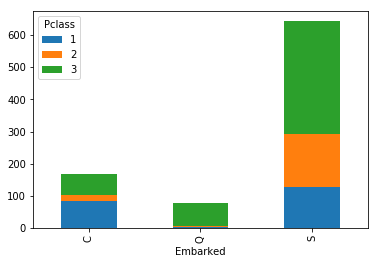

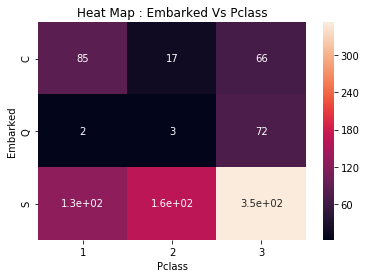

Age       Unknown  Child  Teen  Adult  Old
Embarked                                  
C               4     83    15     43   23
Q               4     15     3     49    6
S              42    372    45     99   86


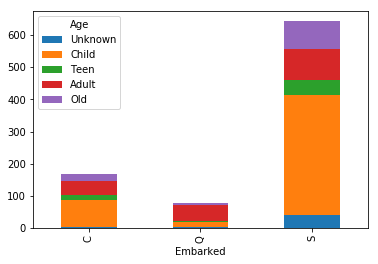

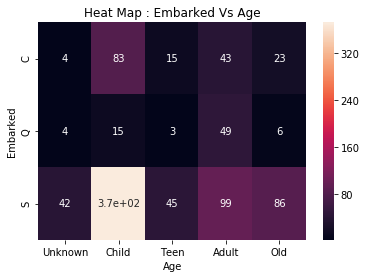

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


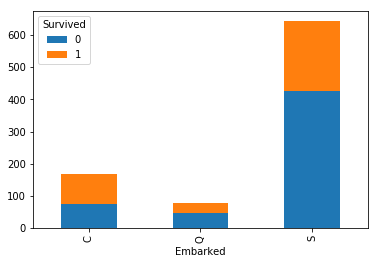

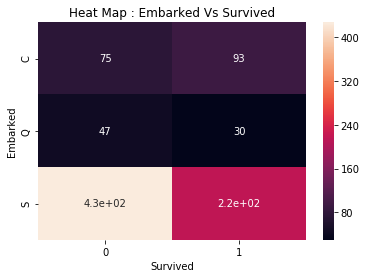

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


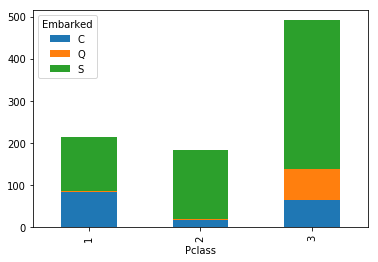

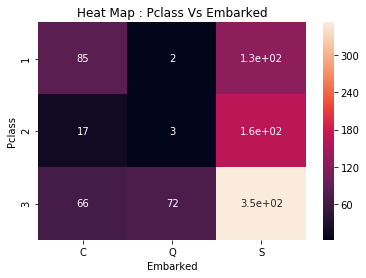

Age     Unknown  Child  Teen  Adult  Old
Pclass                                  
1             2    126    39     31   18
2            12    123    15     16   18
3            36    222    10    144   79


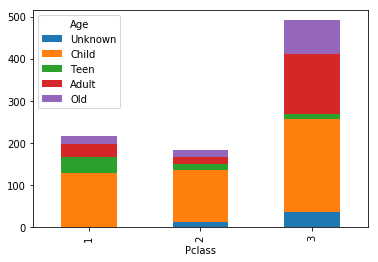

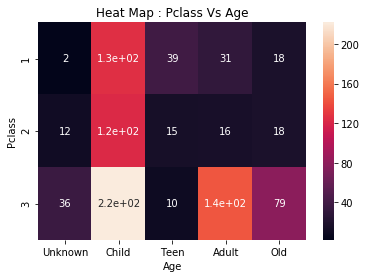

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


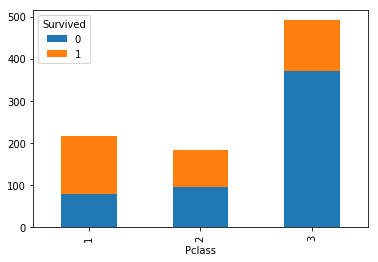

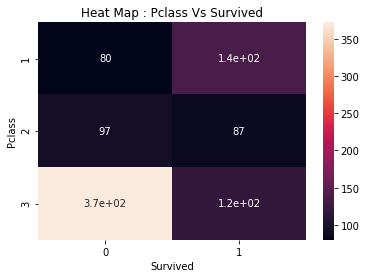

Embarked   C   Q    S
Age                  
Adult     43  49   99
Unknown    4   4   42
Old       23   6   86
Child     83  15  372
Teen      15   3   45


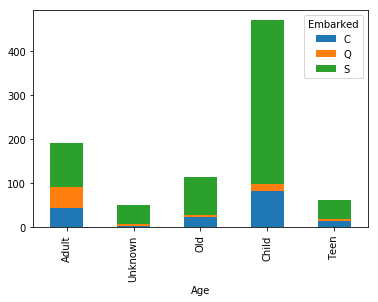

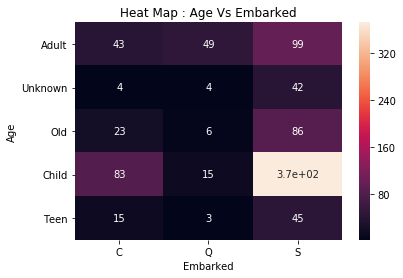

Pclass     1    2    3
Age                   
Adult     31   16  144
Unknown    2   12   36
Old       18   18   79
Child    126  123  222
Teen      39   15   10


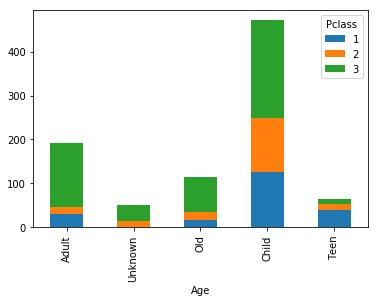

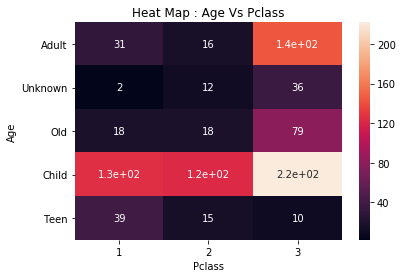

Survived    0    1
Age               
Adult     127   64
Unknown    24   26
Old        71   44
Child     285  186
Teen       42   22


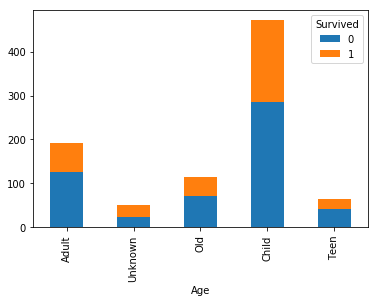

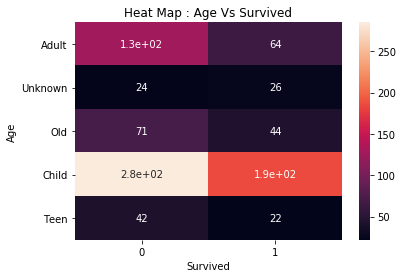

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


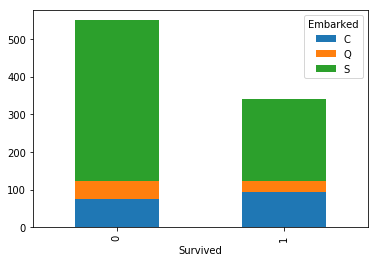

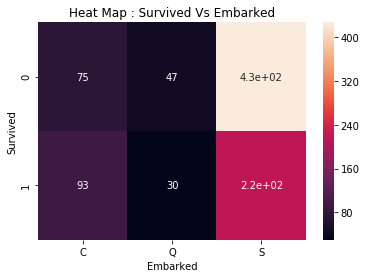

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


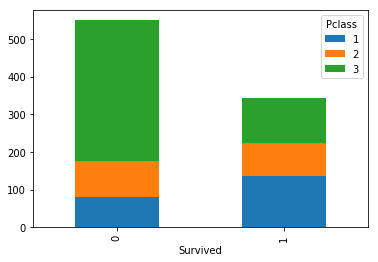

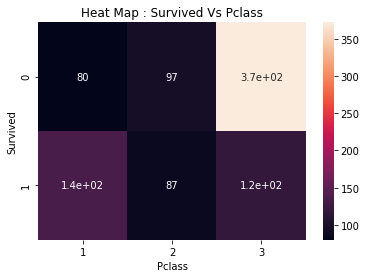

Age       Unknown  Child  Teen  Adult  Old
Survived                                  
0              24    285    42    127   71
1              26    186    22     64   44


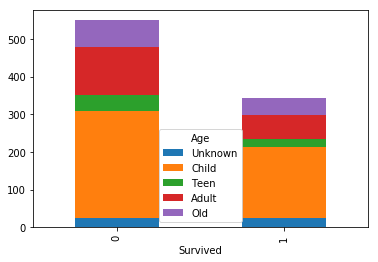

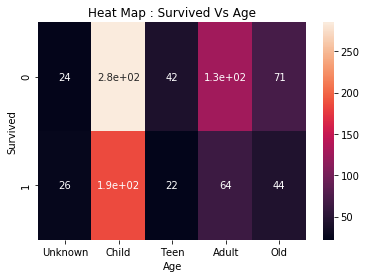

In [13]:
import seaborn as sns
for n in nominal_cols:
    for m in nominal_cols:
        if n == m or len(in_titanic[n].value_counts()) > 10 or len(in_titanic[m].value_counts())> 10:
            continue
        out = pd.crosstab(in_titanic[n], in_titanic[m])
        print out
        out.plot.bar(stacked=True)
        plt.show()
        # Plotting In Sea Born

        ax = plt.subplot()
        sns.heatmap(out, annot=True, ax=ax)

        # labels, title and ticks
        ax.set_xlabel(m)
        ax.set_ylabel(n)
        title = 'Heat Map : '+ n+ ' Vs '+ m
        ax.set_title(title)
        plt.show()